In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [140]:
test_titanic=pd.read_csv("test.csv")
test_titan=test_titanic.copy()

titanic = pd.read_csv("train.csv")
titan=titanic.copy()

In [141]:
test_titan

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [142]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#################################################################################################################################################################################

In [96]:
def simpletask(titan):
    ##isimdeki kelime sayısını buluyor
    titan["Alphabet_Num"] = titan["Name"].str.len()

    ##boş yaşları ortalamalarla değiştiriyor
    ort = np.mean(titan["Age"])
    titan["Age"] = titan["Age"].fillna(ort)

    ## Cabin Harflerini Belirliyor
    titan["Cabin"]=titan["Cabin"].fillna("0")
    m = titan["Cabin"].shape[0]
    for i in range(m): 
        for c in titan["Cabin"][i]:
            if c.isalpha():
                titan["Cabin"][i]=c
    return titan

In [97]:
titan=simpletask(titan)
test_titan=simpletask(test_titan)

C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1353514601.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1353514601.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1353514601.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipy

In [98]:
FOranlar = {
    "A": .11,
    "B": .32,
    "C": .42,
    "D": .15,
}
SOranlar = {
    "D": .23,
    "E": .39,
    "F": .38,
}
TOranlar = {
    "G": 1,
}


olas=[FOranlar,SOranlar,TOranlar]

In [107]:
 #İnternetten aldığım verilere göre 1st 2nd 3rd seviye yolcuların odalarda olma ihtimaline göre dağılım
def fill_cabins(titan,olas):
   
    class_num=len(pd.unique(titan["Pclass"]))
    

    for k in range(class_num):

        total_each_cabin= titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].shape[0]
        cabin_left=total_each_cabin

        for i,j in olas[k].items():

            sample=int(np.round(total_each_cabin*j))

            
            if cabin_left < sample:
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(cabin_left).index.values,list(titan.columns).index("Cabin")]=i
                print(cabin_left, j,i)
            else:
                cabin_left= cabin_left-sample
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(sample).index.values,list(titan.columns).index("Cabin")]=i
                print(sample, j,i)

    return titan

In [108]:
titan=fill_cabins(titan,olas)
test_titan=fill_cabins(test_titan,olas)

4 0.11 A
13 0.32 B
17 0.42 C
6 0.15 D
39 0.23 D
66 0.39 E
63 0.38 F
479 1 G


In [123]:
##Height adında bi bölüm oluşturup, geminin en yukarısından en aşağısını numaralandırıyor
def height_func(titan):
    height= {
        "A": 10,
        "B": 20,
        "C": 30,
        "D": 40,
        "E": 50,
        "F": 60,
        "G": 70,
        "T": 10,
    }
    titan["height"]=np.NaN
    for i,j in height.items():
        tits=titan[titan["Cabin"]==i]
        tits["height"]= tits["height"].fillna(j)
        titan[titan["Cabin"]==i]=tits
        titan["heightsqrd"]=titan["height"]**2
    return titan

In [124]:
test_titan= height_func(test_titan)
titan= height_func(titan)

C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1125734628.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tits["height"]= tits["height"].fillna(j)
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1125734628.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tits["height"]= tits["height"].fillna(j)
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\1125734628.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [567]:
titan = pd.get_dummies(titan, columns=["Sex"])
titan = pd.get_dummies(titan, columns=["Cabin"])
test_titan = pd.get_dummies(titan, columns=["Sex"])
test_titan = pd.get_dummies(titan, columns=["Cabin"])

#########################################################################################################################################################

In [143]:
def dfislemler(titan):
    FOranlar = {
        "A": .11,
        "B": .32,
        "C": .42,
        "D": .15,
    }
    SOranlar = {
        "D": .23,
        "E": .39,
        "F": .38,
    }
    TOranlar = {
        "G": 1,
    }
    height= {
        "A": 10,
        "B": 20,
        "C": 30,
        "D": 40,
        "E": 50,
        "F": 60,
        "G": 70,
        "T": 10,
    }

    olas=[FOranlar,SOranlar,TOranlar]
        
    ##isimdeki kelime sayısını buluyor
    titan["Alphabet_Num"] = titan["Name"].str.len()

    ##boş yaşları ortalamalarla değiştiriyor
    ort = np.mean(titan["Age"])
    titan["Age"] = titan["Age"].fillna(ort)

    ## Cabin Harflerini Belirliyor
    titan["Cabin"]=titan["Cabin"].fillna("0")
    m = titan["Cabin"].shape[0]
    for i in range(m): 
        for c in titan["Cabin"][i]:
            if c.isalpha():
                titan["Cabin"][i]=c

    #İnternetten aldığım verilere göre 1st 2nd 3rd seviye yolcuların odalarda olma ihtimaline göre dağılım
    class_num=len(pd.unique(titan["Pclass"]))
    

    for k in range(class_num):

        total_each_cabin= titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].shape[0]
        cabin_left=total_each_cabin

        for i,j in olas[k].items():

            sample=int(np.round(total_each_cabin*j))

            
            if cabin_left < sample:
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(cabin_left).index.values,list(titan.columns).index("Cabin")]=i
                
            else:
                cabin_left= cabin_left-sample
                titan.iloc[titan.loc[(titan["Pclass"]==k+1) & (titan["Cabin"]=="0")].sample(sample).index.values,list(titan.columns).index("Cabin")]=i
                

    ##Height adında bi bölüm oluşturup, geminin en yukarısından en aşağısını numaralandırıyor
    titan["height"]=np.NaN
    for i,j in height.items():
        tits=titan[titan["Cabin"]==i]
        tits["height"]= tits["height"].fillna(j)
        titan[titan["Cabin"]==i]=tits

    #Yeni bir Feature
    titan["heightsqrd"]=titan["height"]**2

    #Cabinleri ve Sexleri ayırma 
    titan = pd.get_dummies(titan, columns=["Sex"])
    titan = pd.get_dummies(titan, columns=["Cabin"])

    return titan


In [144]:
titan =dfislemler(titan)
test_titan =dfislemler(test_titan)

C:\Users\musta\AppData\Local\Temp\ipykernel_17084\2163016939.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\2163016939.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipykernel_17084\2163016939.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan["Cabin"][i]=c
C:\Users\musta\AppData\Local\Temp\ipy

In [145]:
test_titan.columns

Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Alphabet_Num', 'height', 'heightsqrd',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G'],
      dtype='object')

In [160]:
test_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          418 non-null    float64
 8   Embarked      418 non-null    object 
 9   Alphabet_Num  418 non-null    int64  
 10  height        418 non-null    float64
 11  heightsqrd    418 non-null    float64
 12  Sex_female    418 non-null    bool   
 13  Sex_male      418 non-null    bool   
 14  Cabin_A       418 non-null    bool   
 15  Cabin_B       418 non-null    bool   
 16  Cabin_C       418 non-null    bool   
 17  Cabin_D       418 non-null    bool   
 18  Cabin_E       418 non-null    

In [150]:
test_titan["Fare"]=test_titan["Fare"].fillna(np.mean(test_titan["Fare"]))

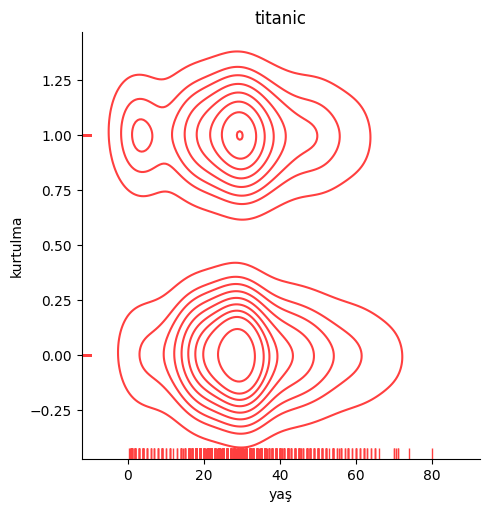

In [151]:
sns.displot(titan, x = "Age", y = "Survived", kind = "kde", rug = True, color = "#FF3F3F")
plt.ylabel("kurtulma")
plt.xlabel("yaş")
plt.title("titanic")
plt.show()

In [159]:
titancorr=titan[['Pclass', 'Age', 'SibSp', 'Parch', 
       'Fare', 'Alphabet_Num', 'height', 'heightsqrd',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G',"Survived"]]
titancorr.corr()

,Pclass,Age,SibSp,Parch,Fare,Alphabet_Num,height,heightsqrd,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.220001,0.927723,0.951597,-0.131900,0.131900,-0.231175,-0.420820,-0.478244,-0.280740,-0.220341,-0.104588,0.906346,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.031533,-0.315854,-0.319651,-0.084153,0.084153,0.119281,0.111435,0.159141,0.118711,0.090823,-0.056284,-0.276517,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,0.165019,0.093062,0.095892,0.114631,-0.114631,-0.048901,-0.038117,0.004562,-0.056910,-0.051125,0.001283,0.095750,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.252282,0.031277,0.031049,0.245489,-0.245489,-0.050632,0.033935,-0.004993,-0.062919,-0.016747,0.064026,0.012718,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.155832,-0.541353,-0.530323,0.182333,-0.182333,0.050635,0.393922,0.398987,0.033424,-0.030245,-0.051828,-0.408437,0.257307
Alphabet_Num,-0.220001,0.031533,0.165019,0.252282,0.155832,1.000000,-0.205319,-0.211699,0.448759,-0.448759,0.045779,0.102391,0.105534,0.025134,0.096032,0.010878,-0.205099,0.332350
height,0.927723,-0.315854,0.093062,0.031277,-0.541353,-0.205319,1.000000,0.988118,-0.113338,0.113338,-0.377273,-0.538177,-0.442743,-0.277793,-0.121567,0.062016,0.834910,-0.305844
heightsqrd,0.951597,-0.319651,0.095892,0.031049,-0.530323,-0.211699,0.988118,1.000000,-0.124460,0.124460,-0.289649,-0.480569,-0.457699,-0.338654,-0.202230,0.019334,0.896364,-0.320579
Sex_female,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.448759,-0.113338,-0.124460,1.000000,-1.000000,-0.043841,0.101762,0.035465,0.037504,0.060635,0.039879,-0.138116,0.543351
Sex_male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-0.448759,0.113338,0.124460,-1.000000,1.000000,0.043841,-0.101762,-0.035465,-0.037504,-0.060635,-0.039879,0.138116,-0.543351


In [163]:
X=titan[['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'height', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G',"heightsqrd","Alphabet_Num"]].values
       
X_test=test_titan[['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'height', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G',"heightsqrd","Alphabet_Num"]].values

m,n = X.shape

scaler_poly = StandardScaler()
X = scaler_poly.fit_transform(X)
X_test = scaler_poly.fit_transform(X_test)

y=titan[["Survived"]].values

lr_model = LogisticRegression()
lr_model.fit(X, y)

c:\Users\musta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [164]:
##Prediction Yapılıyor

y_pred = lr_model.predict(X_test)

print("Prediction on training set:", y_pred)
print("Accuracy on training set:", lr_model.score(X, y))


Prediction on training set: [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy on training set: 0.8058361391694725


In [172]:
realtest=pd.read_csv("gender_submission.csv")

In [175]:
result = pd.merge(realtest, test_titan[["PassengerId"]], on='PassengerId', how="inner")

In [178]:
np.abs(result["Survived"]-y_pred).sum()

23

In [179]:
y=y.reshape(891,1)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [189]:
def deeplearn(X,y,epochs):
    model = Sequential(
        [ 
            
            Dense(50, activation = 'relu'),
            Dense(50, activation = 'relu'),
            Dense(1, activation = 'sigmoid')    
        ]
    )
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(0.001),
    )

    model.fit(
        X, y,
        epochs=epochs
    )
    return model
        

In [197]:
epocs=[10,20,30,40,50,100,200,300]
models=[]
preds=[]
loss=[]

In [198]:
for i in range(len(epocs)):
    model = deeplearn(X,y,epocs[i])
    models.append(model)
    predictions = model.predict(X_test)
    preds.append(predictions)
    yhat = np.zeros_like(predictions)
    m , n=predictions.shape
    yhat=yhat.reshape(m,)
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            yhat[i] = 1
        else:
            yhat[i] = 0
    los=(np.abs(result["Survived"]-yhat)).sum()
    loss.append(los)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6130
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4569 
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4281 
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4268 
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4195 
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4121 
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3901 
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4063 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4189 
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4056 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6176
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4960 
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4681 
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4015 
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━

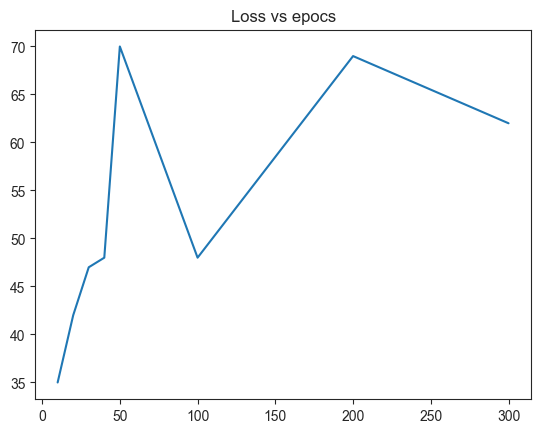

In [200]:
sns.lineplot(x = epocs, y = loss)
plt.title("Loss vs epocs")
sns.set_style("ticks")
plt.show()

In [199]:
loss

[35.0, 42.0, 47.0, 48.0, 70.0, 48.0, 69.0, 62.0]